<a href="https://colab.research.google.com/github/yukiharada1228/neural_network/blob/main/Effect_of_activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワークによる非線形関数の学習

ニューラルネットワークにおける活性化関数は非線形な関数を表現するために必要なものである。<br>
今回は非線形な関数として表現できる排他的論理和を学習対象とし、活性化関数の役割を調べる。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
SEED = 1
NUM_EPOCH = int(1e+3)
INPUT_SIZE = 2
OUTPUT_SIZE = 1

hidden_size = 2
lr = 0.1
w_std = 1.0

In [3]:
# 入力データと教師ラベル
x = np.asarray([[0,0],[1,0],[0,1],[1,1]], dtype=np.float64)
y_train = np.asarray([0,1,1,0], dtype=np.float64)
# ランダムシード固定
np.random.seed(SEED)

In [4]:
num_train_data = len(y_train)

In [5]:
# 活性化関数（シグモイド関数）の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

## 活性化関数を不使用

$$ w_1(w_2x+b_2)+b_1 = (w_1w_2)x+(b_1+w_1b_2) $$

In [6]:
# モデルの定義
class MLPWithoutActivationFunction:
    
    def __init__(self, input_size, hidden_size, output_size, w_std=w_std):
        self.w1 = w_std * np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = w_std * np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)
        self.grads = {}

    def forward(self, x):
        self.h1 = np.dot(x, self.w1) + self.b1
        self.h2 = self.h1
        self.h3 = np.dot(self.h2, self.w2) + self.b2
        self.y = sigmoid(self.h3)
        return self.y

    def backward(self, x, t): 
        self.grads = {}

        dy = -1 * (t - self.y)
        d_h3 = sigmoid_grad(self.h3) * dy
        self.grads['w2'] = np.dot(self.h2.T, d_h3)
        self.grads['b2'] = np.sum(d_h3, axis=0)

        d_h2 = np.dot(d_h3, self.w2.T)
        d_h1 = self.h1 * d_h2
        self.grads['w1'] = np.dot(x.T, d_h1)
        self.grads['b1'] = np.sum(d_h1, axis=0)

    def update_parameters(self, lr=lr):
        self.w1 -= lr * self.grads['w1']
        self.b1 -= lr * self.grads['b1']
        self.w2 -= lr * self.grads['w2']
        self.b2 -= lr * self.grads['b2']

In [7]:
# モデルのパラメータを表示
def display_model_parameters(model):
    print("w1:", model.w1)
    print("b1:", model.b1)
    print("w2:", model.w2)
    print("b2:", model.b2)

# モデルの作成
model = MLPWithoutActivationFunction(input_size=INPUT_SIZE, 
                                     hidden_size=hidden_size, 
                                     output_size=OUTPUT_SIZE)

# モデルパラメータの初期値を表示
display_model_parameters(model)

w1: [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
b1: [0. 0.]
w2: [[ 0.86540763]
 [-2.3015387 ]]
b2: [0.]


In [8]:
# 学習パラメータの設定
def train(model, num_epoch):
    epoch_list = []
    train_loss_list = []
    train_accuracy_list = []

    iteration = 0
    for epoch in range(1, num_epoch+1, 1):
        sum_loss = 0.0
    
        for i in range(0, num_train_data, 1):
            input = x[i:i+1]
            label = y_train[i:i+1]

            y_pred = model.forward(input)

            sum_loss += np.sum(np.power(y_pred - label, 2))

            model.backward(input, label.reshape(-1, 1))
            model.update_parameters(lr=lr)

        # 学習途中のlossの保存
        epoch_list.append(epoch)
        train_loss_list.append(sum_loss)
        if epoch%100 == 0:
            print("epoch: {}, loss: {}".format(epoch, sum_loss))
    
    return epoch_list, train_loss_list

epoch_list, train_loss_list = train(model, NUM_EPOCH)

# モデルのパラメータを表示
display_model_parameters(model)

epoch: 100, loss: 1.2032855231746244
epoch: 200, loss: 1.098451850265066
epoch: 300, loss: 1.0757997841731592
epoch: 400, loss: 1.0511327145719922
epoch: 500, loss: 1.03773270834845
epoch: 600, loss: 1.0296125315874822
epoch: 700, loss: 1.0241748149563148
epoch: 800, loss: 1.020291326816213
epoch: 900, loss: 1.017391583766478
epoch: 1000, loss: 1.0151534336098897
w1: [[ 1.37415847 -1.82984312]
 [-0.75792394 -1.82252772]]
b1: [-0.38658986  1.91285139]
w2: [[-0.03571878]
 [-3.02110461]]
b2: [2.65415756]


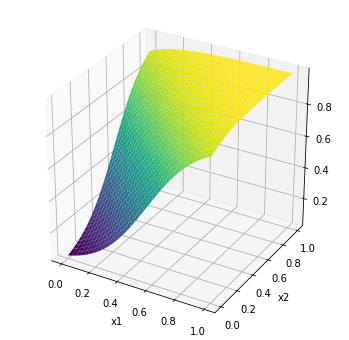


[0. 0.] False

[1. 0.] True

[0. 1.] True

[1. 1.] True


In [9]:
def predict(model):
    # x1とx2の生成
    x1 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
    x2 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
    X1, X2 = np.meshgrid(x1, x2)

    # 入力x1とx2の出力を計算しvalに代入
    val = []

    for v in x2:
        for u in x1:
            input = u, v
            val.append(model.forward(input))

    val = np.asarray(val)
    val = val.reshape(X1.shape)

    # 3D表示 (PDFにセーブ)  
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X1, X2, val, cmap='viridis') 
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    # plt.savefig("MLP-3D.pdf")
    plt.show()

    for i in range(4):
        print()
        pred = model.forward(x[i])
        try: print(x[i], (pred > 0.5)[0])
        except: print(x[i], (pred > 0.5))

predict(model)

活性化関数を使用しないパーセプトロンは線形な変換である。<br>
線形変換を繰り返しても非線形な関数を表現することはできず、学習することができなかった。

## 活性化関数不使用の２つのパーセプトロンの合成関数

2次関数となるため非線形関数
$$ (w_1x+b_1)(w_2x+b_2) = (w_1w_2)x^2+(w_1b_2+w_2b_1)x+b_1b_2 $$

In [10]:
# モデルの定義
class PWithQuadraticFunction:
    
    def __init__(self, input_size, output_size, w_std=w_std):
        self.w1 = w_std * np.random.randn(input_size, output_size)
        self.b1 = np.zeros(output_size)
        self.w2 = w_std * np.random.randn(input_size, output_size)
        self.b2 = np.zeros(output_size)
        self.grads = {}

    def forward(self, x):
        self.h1 = np.dot((np.dot(x, self.w1) + self.b1),((np.dot(x, self.w2) + self.b2)).T)
        self.h2 = self.h1
        self.h3 = self.h2
        self.y = sigmoid(self.h3)
        return self.y

    def backward(self, x, t): 
        self.grads = {}

        dy = -1 * (t - self.y)
        d_h3 = sigmoid_grad(self.h3) * dy

        d_h2 = self.h2 * d_h3
        d_h1 = self.h1 * d_h2

        self.grads['w2'] = np.dot(np.dot(np.dot(x.T, x).T, self.w1)+x.T*self.b1, d_h1)
        self.grads['b2'] = np.sum(d_h1*(np.dot(x, self.w1)+self.b1), axis=0)
        self.grads['w1'] = np.dot(np.dot(np.dot(x.T, x).T, self.w2)+x.T*self.b2, d_h1)
        self.grads['b1'] = np.sum(d_h1*(np.dot(x, self.w2)+self.b2), axis=0)

    def update_parameters(self, lr=lr):
        self.w1 -= lr * self.grads['w1']
        self.b1 -= lr * self.grads['b1']
        self.w2 -= lr * self.grads['w2']
        self.b2 -= lr * self.grads['b2']

In [11]:
# モデルの作成
model = PWithQuadraticFunction(input_size=INPUT_SIZE, 
                               output_size=OUTPUT_SIZE)

# モデルパラメータの初期値を表示
display_model_parameters(model)

w1: [[ 1.74481176]
 [-0.7612069 ]]
b1: [0.]
w2: [[ 0.3190391 ]
 [-0.24937038]]
b2: [0.]


In [12]:
epoch_list, train_loss_list = train(model, NUM_EPOCH)

# モデルのパラメータを表示
display_model_parameters(model)

epoch: 100, loss: 0.8754136225543748
epoch: 200, loss: 0.7195421248047374
epoch: 300, loss: 0.45181661605848783
epoch: 400, loss: 0.44248698646785795
epoch: 500, loss: 0.4257663435538638
epoch: 600, loss: 0.3143286436945084
epoch: 700, loss: 0.2296514970060976
epoch: 800, loss: 0.22819795963128142
epoch: 900, loss: 0.22778254146890492
epoch: 1000, loss: 0.22748580783765548
w1: [[ 3.60002399]
 [-1.72899493]]
b1: [0.38279948]
w2: [[ 1.42810071]
 [-3.25107189]]
b2: [-0.24373528]


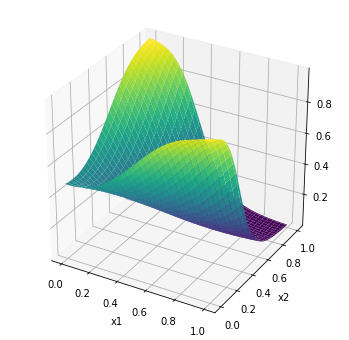


[0. 0.] False

[1. 0.] True

[0. 1.] True

[1. 1.] False


In [13]:
predict(model)

困難ではあるが2次関数を表現できるため学習可能

## 活性化関数を使用

In [14]:
# モデルの定義
class MLP:
    
    def __init__(self, input_size, hidden_size, output_size, w_std=w_std):
        self.w1 = w_std * np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = w_std * np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)
        self.grads = {}

    def forward(self, x):
        self.h1 = np.dot(x, self.w1) + self.b1
        self.h2 = sigmoid(self.h1)
        self.h3 = np.dot(self.h2, self.w2) + self.b2
        self.y = sigmoid(self.h3)
        return self.y

    def backward(self, x, t): 
        self.grads = {}

        dy = -1 * (t - self.y)
        d_h3 = sigmoid_grad(self.h3) * dy
        self.grads['w2'] = np.dot(self.h2.T, d_h3)
        self.grads['b2'] = np.sum(d_h3, axis=0)

        d_h2 = np.dot(d_h3, self.w2.T)
        d_h1 = sigmoid_grad(self.h1) * d_h2
        self.grads['w1'] = np.dot(x.T, d_h1)
        self.grads['b1'] = np.sum(d_h1, axis=0)

    def update_parameters(self, lr=lr):
        self.w1 -= lr * self.grads['w1']
        self.b1 -= lr * self.grads['b1']
        self.w2 -= lr * self.grads['w2']
        self.b2 -= lr * self.grads['b2']

In [15]:
# モデルの作成
model = MLP(input_size=INPUT_SIZE,
            hidden_size=hidden_size,
            output_size=OUTPUT_SIZE)

In [16]:
epoch_list, train_loss_list = train(model, num_epoch=int(5e+3))

epoch: 100, loss: 1.0088460628051192
epoch: 200, loss: 0.9906243478855028
epoch: 300, loss: 0.9748498048278319
epoch: 400, loss: 0.9593420529729393
epoch: 500, loss: 0.94309302721592
epoch: 600, loss: 0.9256970734722979
epoch: 700, loss: 0.9071457198771147
epoch: 800, loss: 0.8877525191585527
epoch: 900, loss: 0.8680726005969315
epoch: 1000, loss: 0.8487697503686922
epoch: 1100, loss: 0.8304617309903486
epoch: 1200, loss: 0.8136029464031083
epoch: 1300, loss: 0.7984374431948565
epoch: 1400, loss: 0.785014035021768
epoch: 1500, loss: 0.7732340691721367
epoch: 1600, loss: 0.7629042063973619
epoch: 1700, loss: 0.7537784551726013
epoch: 1800, loss: 0.7455850693402135
epoch: 1900, loss: 0.7380412293558327
epoch: 2000, loss: 0.7308620335843965
epoch: 2100, loss: 0.7237709514797557
epoch: 2200, loss: 0.7165158338648756
epoch: 2300, loss: 0.7088869584092372
epoch: 2400, loss: 0.7007249156111426
epoch: 2500, loss: 0.6919057890179663
epoch: 2600, loss: 0.6823034551285087
epoch: 2700, loss: 0.671

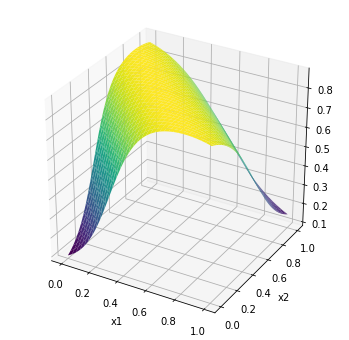


[0. 0.] False

[1. 0.] True

[0. 1.] True

[1. 1.] False


In [17]:
predict(model)

活性関数により非線形な関数を学習することができた。